In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [52]:
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D,Input,SeparableConv2D
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
# from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam
from skimage.io import imread

import tensorflow as tf
tf.test.gpu_device_name()

import os
import numpy as np
import pandas as pd

import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [53]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [54]:
# !cp -r '/content/drive/MyDrive/generated_data/train' 'train_data'

In [55]:
# !cp -r '/content/drive/MyDrive/generated_data/test' 'test_data'

In [56]:
trainDataDir = '/content/drive/MyDrive/majordata/train'
testDataDir = '/content/drive/MyDrive/majordata/test'
os.listdir(testDataDir)
# os.listdir(trainDataDir)


['NORMAL', 'COVID19']

In [57]:
os.listdir(trainDataDir)

['NORMAL', 'COVID19']

In [66]:
trainNormalDir = glob.glob(trainDataDir + '/NORMAL/*')
trainCovidDir = glob.glob(trainDataDir + '/COVID19/*')

In [67]:
normal_images = []
i=0;
for img_path in trainNormalDir:
    i=i+1
    if(i>10):
      break
    normal_images.append(mpimg.imread(img_path))

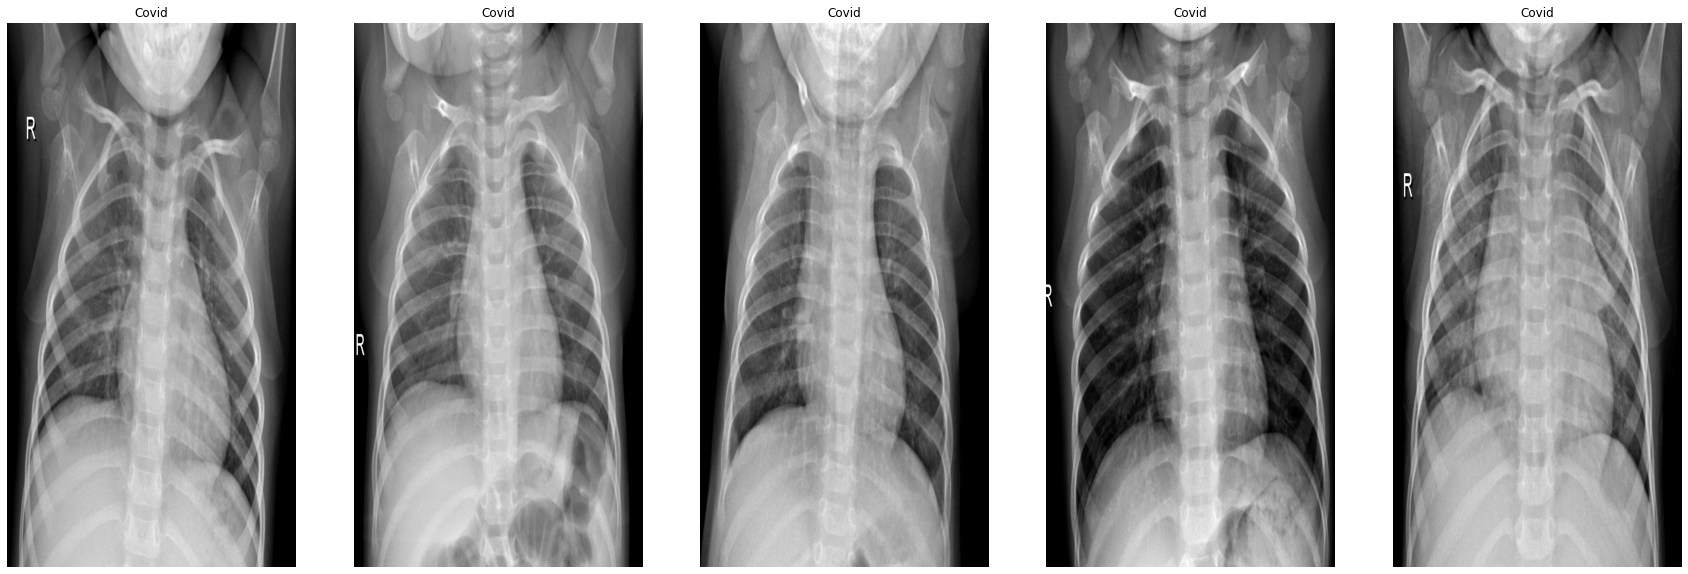

In [68]:
f, ax = plt.subplots(1,5, figsize=(30,10))
i=0
for i in range(5):
    # img = imread(covid_images[i])
    ax[i].imshow(normal_images[i], cmap='gray')
    ax[i].set_title("Covid")
    ax[i].axis('off')
    ax[i].set_aspect('auto')
plt.show()

In [69]:
covid_images = []
i=0
for img_path in trainCovidDir:
    i=i+1
    if(i>10):
      break
    covid_images.append(mpimg.imread(img_path))

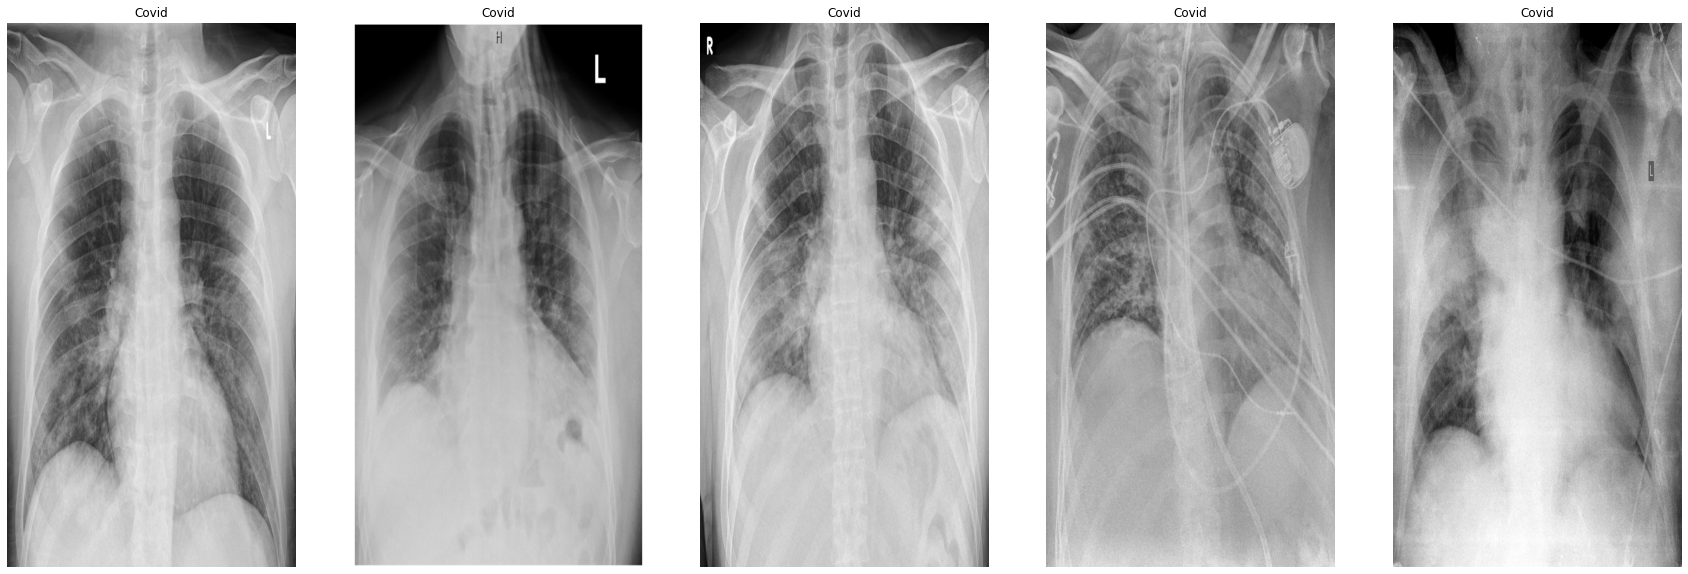

In [70]:
f2, ax2 = plt.subplots(1,5, figsize=(30,10))
for i in range(5):
    # img = imread(covid_images[i])
    ax2[i].imshow(covid_images[i], cmap='gray')
    ax2[i].set_title("Covid")
    ax2[i].axis('off')
    ax2[i].set_aspect('auto')
plt.show()

In [71]:
# print(len(normal_images))
# print(len(covid_images))

In [72]:
imageWidth = 224
imageHeight = 224
channel = 3

inputImageShape = (imageWidth,imageHeight,channel)
classes = 2
epochs = 48
batchSize = 6

In [73]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=inputImageShape, name="conv_1"))
model.add(Activation('relu',name="actv_1"))
model.add(MaxPooling2D(pool_size=(2, 2),name="max_pool_1"))

model.add(Conv2D(32, (3, 3), name="conv_2"))
model.add(Activation('relu',name="actv_2"))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64,(3,3), name="conv_3"))
model.add(Activation("relu",name="actv_3"))
model.add(Conv2D(256,(3,3),name="conv_4"))
model.add(Activation("relu",name="actv_4"))
  
model.add(Conv2D(128,(3,3),name="conv_5"))
model.add(Activation("relu",name="actv_5"))
model.add(AvgPool2D(2,2))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu",name="actv_6"))
model.add(AvgPool2D(2,2))

model.add(Conv2D(256,(2,2),name="conv_6"))
model.add(Activation("relu",name="actv_7"))
model.add(MaxPool2D(2,2))
    
model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.25))
model.add(Dense(1))
model.add(Activation("sigmoid",name="actv_8"))

In [74]:
# model =  build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
actv_1 (Activation)          (None, 222, 222, 32)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 111, 111, 32)      0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 109, 109, 32)      9248      
_________________________________________________________________
actv_2 (Activation)          (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 54, 54, 32)        0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 52, 52, 64)        1

In [105]:
opt = Adam(lr=0.0001, decay=1e-5)
es = EarlyStopping(patience=5)
chkpt = ModelCheckpoint(filepath='/weights/my_model_weight.h5', save_best_only=True, save_weights_only=True)
model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer=opt)

In [106]:
train_datagen = ImageDataGenerator(rescale=1./255,
    samplewise_center=True,
    samplewise_std_normalization= True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.3
)

train_generator = train_datagen.flow_from_directory(
    trainDataDir,
    target_size=(imageWidth,imageHeight),
    batch_size=batchSize,
    class_mode='binary',
    subset='training')

# test_generator =train_datagen.flow_from_directory(
#     testDataDir,
#     target_size=(imageWidth,imageHeight),
#     batch_size=batchSize,
#     class_mode='binary',
#     )
validation_generator = train_datagen.flow_from_directory(
    trainDataDir, 
    target_size=(imageWidth,imageHeight),
    batch_size=batchSize,
    class_mode='binary',
    shuffle= False,
    subset='validation')

Found 1209 images belonging to 2 classes.
Found 517 images belonging to 2 classes.


In [107]:
print("Number of steps for training {}".format(train_generator.samples//batchSize))

Number of steps for training 201


In [108]:
print("Number of steps for training {}".format(validation_generator.samples//batchSize))

Number of steps for training 86


In [109]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batchSize,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batchSize,
    callbacks=[chkpt],
    epochs = epochs)

Epoch 1/48
201/201 [==============================] - 93s 461ms/step - loss: 0.1071 - accuracy: 0.9842 - val_loss: 0.2292 - val_accuracy: 0.9787
Epoch 2/48
201/201 [==============================] - 92s 456ms/step - loss: 0.0502 - accuracy: 0.9942 - val_loss: 0.2614 - val_accuracy: 0.9826
Epoch 3/48
201/201 [==============================] - 92s 457ms/step - loss: 0.0769 - accuracy: 0.9900 - val_loss: 0.2387 - val_accuracy: 0.9806
Epoch 4/48
201/201 [==============================] - 92s 457ms/step - loss: 0.0604 - accuracy: 0.9884 - val_loss: 0.1581 - val_accuracy: 0.9845
Epoch 5/48
201/201 [==============================] - 92s 458ms/step - loss: 0.0371 - accuracy: 0.9933 - val_loss: 0.4050 - val_accuracy: 0.9651
Epoch 6/48
201/201 [==============================] - 92s 458ms/step - loss: 0.0222 - accuracy: 0.9942 - val_loss: 0.2157 - val_accuracy: 0.9806
Epoch 7/48
201/201 [==============================] - 93s 460ms/step - loss: 0.0310 - accuracy: 0.9925 - val_loss: 0.2841 - val_ac

In [110]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator =test_datagen.flow_from_directory(
    testDataDir,
    target_size=(imageWidth,imageHeight),
    batch_size=batchSize,
    class_mode='binary',
    shuffle= False,
    )

Found 451 images belonging to 2 classes.


In [111]:
pred= model.predict(test_generator)

In [112]:
pred

array([[1.0390035e-10],
       [4.1955181e-12],
       [4.3705226e-05],
       [5.9096647e-06],
       [6.7604543e-24],
       [4.8643034e-13],
       [2.9886029e-24],
       [2.1322288e-15],
       [3.5759371e-11],
       [1.7796455e-11],
       [6.7507149e-16],
       [5.7548542e-19],
       [9.1774757e-09],
       [6.3166881e-11],
       [2.1964364e-12],
       [9.8275268e-01],
       [2.8192203e-16],
       [3.2875125e-04],
       [2.0261008e-04],
       [7.5783178e-06],
       [1.0110782e-14],
       [1.0110782e-14],
       [4.4672537e-09],
       [3.2305805e-04],
       [3.0007812e-16],
       [6.0318306e-11],
       [1.8041118e-12],
       [7.1611082e-25],
       [2.9781708e-10],
       [2.8737323e-13],
       [2.5283340e-08],
       [2.3995813e-14],
       [5.4122785e-17],
       [8.6846383e-16],
       [6.5700005e-17],
       [2.0497089e-10],
       [2.3988733e-09],
       [5.7510789e-07],
       [1.9304954e-02],
       [4.8811671e-15],
       [4.6248666e-13],
       [2.244726

In [113]:
label = test_generator.classes

In [114]:
predicted_class_indices=pred
predicted_class_indices[predicted_class_indices>0.5]=1
predicted_class_indices[predicted_class_indices<=0.5]=0


output=[]
for i in range(predicted_class_indices.shape[0]):
    output.append(int(predicted_class_indices[i]))


labels = (test_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in output]
print(output)
print (labels)
print (predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [115]:
exp_series = pd.Series(label)
pred_series = pd.Series(output)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,1,All
Actual,,,
0,113,3,116
1,0,335,335
All,113,338,451


In [116]:
test_loss, test_score = model.evaluate(test_generator, batch_size=batchSize)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

76/76 [==============================] - 19s 244ms/step - loss: 0.0360 - accuracy: 0.9933
Loss on test set:  0.03602806106209755
Accuracy on test set:  0.9933481216430664


<Figure size 432x288 with 0 Axes>

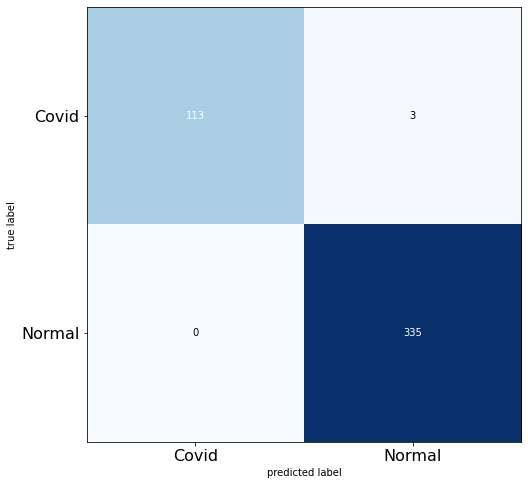

In [117]:
cm  = confusion_matrix(test_generator.classes, output)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.yticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.show()

In [118]:
tn, fp, fn, tp = cm.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 1.00
Precision of the model is 0.99


In [119]:
from tensorflow.keras.applications.densenet import DenseNet169
denseNet169 = DenseNet169(input_shape = inputImageShape, 
                                include_top = False, 
                                weights = "imagenet")


for layer in denseNet169.layers:
    layer.trainable = False
denseNet169.summary()

Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [120]:
from tensorflow.keras import Model


x = Flatten()(denseNet169.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(64, activation='relu')(x)
x=Dense(1 , activation='sigmoid')(x)

In [121]:
model = Model( denseNet169.input, x) 

print(model.summary())

Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_10 (ZeroPadding2 (None, 230, 230, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_10[0][0]          
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________

In [122]:
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

In [123]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

filepath="denseNet169_weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True, mode='max')

In [128]:
epochDense169 = 20
history = model.fit(train_generator,
              callbacks=[lr_reduce,checkpoint],
              steps_per_epoch = train_generator.samples // batchSize,
              validation_data = validation_generator, 
              validation_steps = validation_generator.samples // batchSize,
              epochs=epochDense169)

Epoch 1/20
201/201 [==============================] - ETA: 0s - loss: 0.0579 - accuracy: 0.9925
Epoch 00001: val_accuracy did not improve from 0.98256
201/201 [==============================] - 94s 466ms/step - loss: 0.0579 - accuracy: 0.9925 - val_loss: 0.2267 - val_accuracy: 0.9748
Epoch 2/20
201/201 [==============================] - ETA: 0s - loss: 0.0820 - accuracy: 0.9859
Epoch 00002: val_accuracy did not improve from 0.98256
201/201 [==============================] - 93s 464ms/step - loss: 0.0820 - accuracy: 0.9859 - val_loss: 0.2384 - val_accuracy: 0.9767
Epoch 3/20
201/201 [==============================] - ETA: 0s - loss: 0.0903 - accuracy: 0.9884
Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000692397185e-22.

Epoch 00003: val_accuracy did not improve from 0.98256
201/201 [==============================] - 92s 457ms/step - loss: 0.0903 - accuracy: 0.9884 - val_loss: 0.2918 - val_accuracy: 0.9767
Epoch 4/20
201/201 [==============================] - ETA: 0s -

In [129]:
densePred= model.predict(test_generator)

In [130]:
label = test_generator.classes
predicted_class_indices=densePred
predicted_class_indices[predicted_class_indices>0.5]=1
predicted_class_indices[predicted_class_indices<=0.5]=0


outputDense169=[]
for i in range(predicted_class_indices.shape[0]):
    outputDense169.append(int(predicted_class_indices[i]))


labels = (test_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in outputDense169]
print(outputDense169)
print (labels)
print (predictions)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 432x288 with 0 Axes>

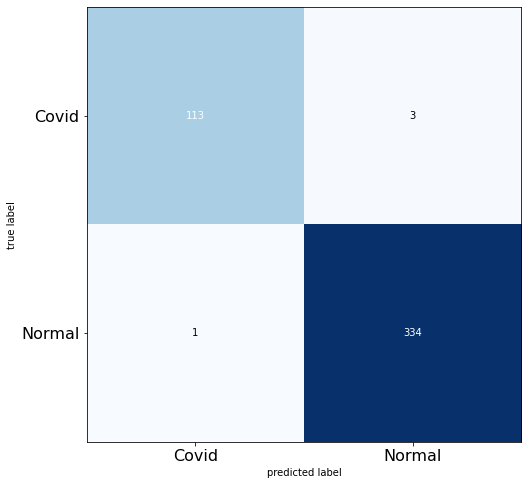

In [131]:
cm  = confusion_matrix(test_generator.classes, outputDense169)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.yticks(range(2), ['Covid', 'Normal'], fontsize=16)
plt.show()